# 07 Estadística-101

Este curso está orientado a personas que quieren reforzar conocimientos de estadísticas básicas aplicadas al análisis de datos voluminosos, de cara a tener una mejor base para futuros procesos de inferencia y otras técnicas analíticas avanzadas.

### Índice

1. Introducción
    * Población
    * Muestras
    * Variables
    * Parámetros
    * Estadígrafos
2. Distribuciones
    * Normal
    * Gamma
3. Teorema del límite central
4. Análisis de umbrales sensibilidad
5. Intervalos de confianza
6. Tamaño muestral
7. Pareto
8. Correlación
9. Regresión lineal
10. Regresión polinomial
11. Clustering



## Librerías  de Python que utilizaremos

In [1]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import math
import matplotlib.pyplot as plt

np.random.seed(1) # para poder replicar el random


### Población
Colección completa de todos los individuos de interés para el investigador.

A continuación mostraremos una población con **distribución Normal** con media $\mu = 0$ y sigma $\sigma = 1$<br>
Las distribuciones normales (o Gaussianas) se aplican a variables continuas, donde la gráfica de su función densidad de proabilidad tiene una forma acampanada y simétrica. Representan más del 50% de los fenomenos industriales estudiados. Sin embargo, hay otras distribuciones que estudiaremos más adelante.

In [107]:
# Generamos una semilla para que la población que creemos sea siempre la misma
np.random.seed(41)
# Generamos la población con la semilla creada
# np.random.normal(media, sigma, size)
poblacion = np.random.normal(0, 1.0, 100) 
print(poblacion)

[-0.27071232  0.10484805  0.25052782 -0.92519997  0.56714366 -1.04018022
 -0.15367595  0.78985181 -1.22621585 -0.94800699 -0.56965394 -0.97715021
 -0.77063171 -0.03371129 -1.03285925  1.14242738 -0.60977801  1.46941639
  1.49267884  0.70712523 -1.85849026 -1.37062377 -0.33010639 -1.51528995
  1.20006019 -1.82261914  0.26938454 -0.44642438  1.1143136  -1.3808026
  1.01542452  0.22408128 -0.64455111  0.66153166  1.29296485 -0.89531205
 -0.56831065 -2.11161836 -0.81830772 -0.96238361  0.12450167  0.10850869
 -0.43930126 -0.71356037  0.93418096  0.05865553  1.60971428  0.85990674
 -0.98520304 -0.95836832  0.44910865 -0.94246256  0.15890945  0.38807562
  0.43733776  0.41822955 -0.73218499 -1.42828297 -2.00921735 -0.23343958
  1.80395237 -1.94867066  1.36785101 -1.85873942 -1.23395073 -0.50756976
  1.4071715  -0.94109705  0.87350473  1.13510019  1.1659844   0.04921449
  0.51094674  0.63129939  0.88770207  0.05765164 -0.32954444 -2.83207869
 -1.18255366 -0.05484602  1.24835183  2.51034292 -0.

Otro tipo de distribución distinta a la Normal, es la **Distribución Uniforme Discreta**. Ahora crearemos una segunda población con datos aleatorios con distribución Uniforme discreta, esta vez representando edades de 1000 adultos.

In [32]:
# de esta forma:   np.random.randint(valor mínimo, valor máximo, size)
edades = np.random.randint(18, high=90, size=10000)
edades[:10] # Visualizamos los diez primeros

array([20, 73, 64, 65, 30, 73, 79, 32, 88, 69])

Si quisieramos crear una **Distribución Uniforme Continua** debemos hacerlo de esta forma:

In [33]:
# np.random.uniform(valor mínimo, valor máximo, size)
edades2 = np.random.uniform(18,90, size=10)
print(edades2)

[50.31097291 35.16332111 79.99456842 65.44892012 82.56207115 29.64267903
 22.29200761 29.05036506 70.69969736 40.76546055]


## Parámetros
Valor que caractariza un aspecto de la población. Ej.: media poblacional, mediana poblacional, desviación estándar poblacional, etc.

Analicemos los parámetros de la población **poblacion**

In [108]:
print('Media poblacional\t\t= {:4.2f}'.format(poblacion.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poblacion.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poblacion)))

Media poblacional		= -0.14
Desviación estándar poblacional	= 1.06
Mediana poblacional		= -0.20


Ahora analicemos los parámetros de la población **edades**

In [100]:
print('Tamaño población edades\t\t\t= {:d} individuos'.format(len(edades)))
print('Media de edades\t\t\t\t= {:4.2f}'.format(edades.mean()))
print('Desviación estándar de las edades\t= {:4.2f}'.format(edades.std()))
print('Mediana poblacional de las edades\t= {:4.2f}'.format(np.median(edades)))
print('Moda poblacional es {} y se repite {} veces'.format(str(stats.mode(edades)[0][0]),
                                              str(stats.mode(edades)[1][0])))

Tamaño población edades			= 10000 individuos
Media de edades				= 53.38
Desviación estándar de las edades	= 20.74
Mediana poblacional de las edades	= 53.00
Moda poblacional es 72 y se repite 172 veces


## Muestra
Subconjunto de la población, el cual es representativo de la misma.

In [109]:
# Tomemos como muestra los diez últimos elementos de la población
muestra1 = poblacion[90:]
print(muestra1)

[ 1.77387679  0.55578305 -0.54871197  1.08001575 -0.75243358  1.15879497
  0.75087133 -1.26271269 -0.79070053 -0.17078885]


In [110]:
# Ahora tomemos como muestra los cincuenta elementos de forma aleatoria desde la población, en la cual todos 
# tienen la misma probabilidad de ser escogidos
muestra2 = np.random.choice(poblacion, 50)
print(muestra2)

[ 0.10850869 -1.37062377  2.51034292  0.43733776  0.25052782 -0.23343958
  0.56714366 -0.33010639 -0.94109705 -0.56831065  0.38807562  1.4071715
 -1.00097056 -0.77063171 -0.94109705  1.49267884 -0.05484602 -0.97715021
  1.24835183  0.66153166 -0.96238361 -1.22621585 -0.05484602 -1.23395073
 -0.45805514  0.05765164 -0.77063171 -1.23395073  0.22408128 -0.81830772
  0.78985181 -1.42828297 -2.83207869 -0.32954444  0.41822955  0.10484805
  0.15890945  0.41822955  0.44910865 -0.98520304 -2.83207869  1.80395237
  2.51034292 -0.23343958  0.78985181  1.77387679  1.08001575  0.38807562
 -0.48675106  0.10484805]


¿Cuál de las dos muestras (1 ó 2) es la mejor?

Lo anterior es un estilo de muestreo aleatorio simple, el cual, junto con su tamaño, aseguran representatividad, es decir, que la muestra sea una imagen confiable de la población. <br>

**Conclusión**<br>
Un buen muestreo aleatorio evita el sesgo muestral, el cual es la tendencia a favorecer la selección de determinados individuos de la población.

### Reflexión
¿Por qué muestrear?<br>
¿Por qué no usar la población completa (el censo) si es que disponemos de él?

## Estadísticos
Medida descriptiva de la muestra que se utiliza para estimar al respectivo parámetro poblacional. El *estadístico* es básicamente lo mismo que el *parámetro poblacional*, pero se diferencia en que se calcula a partir de la muestra y no de la población.

In [111]:
# Estadísticos de la muestra poblacional aleatoria "muestra2"
estadistico_media = muestra2.mean()

# La desvisción estándar para muestras se denomina "desviación estándar insesgada" ya que se calcula dividiendo
# por (n - 1)
estadistico_std = muestra2.std(ddof=1)
print('Media muestral\t\t\t= {:4.2f}'.format(estadistico_media))
print('Desviación estándar muestral\t= {:4.3f}'.format(estadistico_std))
print('Mediana muestral', np.median(muestra2))

Media muestral			= -0.06
Desviación estándar muestral	= 1.126
Mediana muestral 0.001402808290091033


In [50]:
# Calcular Moda (el valor que mayor frecuencia tiene)
stats.mode([1,2,3,3,3,4,4,4,4,5])[0][0]

4

**Observación**<br>
La desviaión estándar muestral se denota con el símbolo: <font color='blue'>$S$</font>  o <font color='blue'>$\widehat{\sigma}$</font>

La media muestral se denota con el símbolo: <font color='blue'>$\overline{X}$</font>  o <font color='blue'>$\widehat{\mu}$</font>


<font color='red'>**** Incluir formula**</font>






## Error muestral
Es la diferencia entre el valor del **parámetro poblacional** y el producido por el **estadístico muestral**.

Se concluye fácilmente que una buena técnica de muestreo reduce el error muestral del estimador.

In [8]:
lista = np.random.normal(3.0, 1.0, 1000000)
dicti = {'a': 1, 'b' : 3}
len(lista)

1000000

In [112]:
print('media población =',np.mean(poblacion))
print('media muestra 1 =',np.mean(muestra1))
print('media muestra 2 =',np.mean(muestra2))

media población = -0.13965168627141547
media muestra 1 = 0.17939942558640887
media muestra 2 = -0.0586089877456301


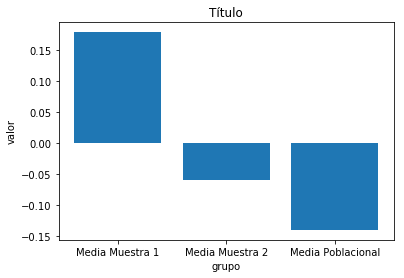

In [113]:
#hacemos un gráfico para ver el error muestral
lista1 = [np.mean(poblacion),np.mean(muestra1),np.mean(muestra2)]   # Declara lista1 con 3 valores de medias
lista2 = ['Media Poblacional','Media Muestra 1','Media Muestra 2'] # Declara lista2 con 3 nombres
plt.bar(lista2, lista1)   # Dibuja el gráfico
plt.title("Título")   # Establece el título del gráfico
plt.xlabel("grupo")   # Establece el título del eje x 
plt.ylabel("valor")   # Establece el título del eje y
plt.show()

 #### Se concluye que el error muestral se explica por la técnica de muestreo y el tamaño de la muestra.

## Distribuciones estadisticas

### Normal

Las distribuciones normales representan más del 50% de los fenomenos industriales estudiados. Esta distribución es de carácter continuo (no discreta).

Los parámetros de media, mediana y moda en una distribución normal son iguales.

La media corresponde al punto en la curva en el cual la perdiente (primera derivada) es cero, y la desviación estándar corresponde a la diferencia de los valores entre el punto de la media y el punto en la curva en los cuales la pendiente cambia de signo.

A considerar:
* Entre el primer **sigma** ($\sigma$) positivo y el primer **sigma** negativo se encuentra el 68% de los casos.
* Entre el segundo **sigma** positivo y el segundo **sigma** negativo se encuentra el 95,5% de los casos. 
* Entre el tercer **sigma** positivo y el tercer **sigma** negativo se encuentra el 99,73% de los casos.

In [97]:
np.random.seed(1)
# Generamos la población con la semilla creada
# donde: np.random.normal(media, sigma, size)
normal = np.random.normal(0, 1.0, 1000) 
print(normal)

[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
  8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
  3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
 -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
 -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
 -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
  9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
 -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
 -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
 -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01
 -1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
  5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
  1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
 -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
  8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
 -7.54397941e-01  1.25286

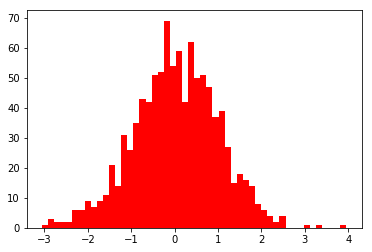

In [96]:
# Hagamos un Histograma (gráfica de frecuencias) donde: 
# Eje X: las clases de la variable estudiada, Eje Y: la frecuencia absoluta de cada clase
plt.hist(normal, 50, color='r')
plt.show()

In [12]:
# Calculemos los parámetros de la población
print('Media poblacional\t\t= {:4.2f}'.format(normal.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(normal.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(normal)))

Media poblacional		= 0.04
Desviación estándar poblacional	= 0.98
Mediana poblacional		= 0.04


### Test de Anderson-Darling
Para comprobar si los datos de nuestra población o muestra siguen una distribución **normal**, utilizaremos un test de normalidad denominado **Anderson-Darling**, el cual  evalúa la hipótesis (y su correspondiente hipótesis nula) de que los datos siguen una distribuión normal:

* H$_0$ :: los datos siguen una distribución normal 
* H$_1$ :: los datos NO siguen una distribución normal

Si el valor arrojado (Test estadístico de Anderson-Darling) es menor al valor crítico dado para un cierto nivel de significanci (e.g.: 5%), se acepta la hipótesis H$_0$, i.e., los datos tienen una distribución normal.

In [127]:
# Ejecutar Test de normalidad
stats.anderson(normal, dist='norm')

AndersonResult(statistic=0.37034000708831627, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<font color='blue'>Conclusión:</font> el resultado del test arroja 0.37, el cual es menor a 0.784 (a nivel de significancia de un 5%), se concluye que los datos tiene una distribución normal.

In [164]:
# Debido a que es Normal, podemos Calcular probabilidad usando Tabla Z acumulada (normalización) 
# ¿Cuál es la probabilidad de que tomemos un elemento al azar y este sea menor a 2?
# Z = (x - mu) / sigma

x = 2 # Valor al que queremos calcular su probabilidad acumulada
mu = np.mean(normal) 
sigma = np.std(normal)
Z = (x - mu)/ sigma
stats.norm.cdf(Z) # Probabilidad acumulada de infinito negativo al valor buscado

0.9772046594224421

In [166]:
# Debido a que es Normal, podemos Calcular probabilidad usando Tabla Z acumulada (normalización)
# ¿Cuál es la probabilidad de que tomemos un elemento al azar y este se encuentre entre -2 y 2?
# Z1 = (x1 - mu) / sigma
# Z2 = (x2 - mu) / sigma

x1 = -2 # Valor al que queremos calcular su probabilidad acumulada
x2 = 2 # Valor al que queremos calcular su probabilidad acumulada
mu = np.mean(normal) 
sigma = np.std(normal)
Z1 = (x1 - mu)/ sigma
Z2 = (x2 - mu)/ sigma

stats.norm.cdf(Z2) - stats.norm.cdf(Z1) # Probabilidad es la resta de 2 probabilidades

0.958363396384192

### Poisson

La distribución **Poisson** se utiliza para contar de forma "discreta". Por ejemplo: cantidad de hijos, personas en una fila, camiones entrando a puerto, DPU (defector por unidad), pérdida de maletas por vuelo, etc.

Crearemos una distribución del tipo Poisson aleatoria en la cual se utilizan dos parámetros:

* $\color{red}{\lambda}$ (lambda) :: representa a la media de la población o muestra (e.g.: cantidad de personas promedio que llegana una cola de un banco por unidad de tiempo (hora)
* $\color{red}n$ :: tamaño de la población o muetra según el caso

Nota:
* La media de una distribución Poisson es $\color{red}{\lambda}$
* La desviación estándar es $\color{red}{\sqrt{\lambda}}$

In [133]:
# Generamos los datos aleatorios con semilla (seed) igual 1
# lam = lambda
lam = 90
size = 100
poisson = np.random.RandomState(seed=1).poisson(lam=lam, size=size)
poisson

array([ 88,  78,  80,  87,  88,  81,  88,  78,  85,  74,  80,  75, 114,
        95,  95,  84,  76, 105,  84,  81,  90,  92,  92,  76,  95,  69,
        95, 110, 105,  78,  87, 107,  97, 103,  97,  83,  88,  95,  77,
        89,  87, 105,  85, 103, 105,  80, 108,  72,  96, 102,  91,  77,
        92,  92,  99,  99, 102,  91,  71,  67,  82,  92,  92,  83,  81,
        82,  93,  79,  72,  93,  92,  91,  95,  72,  94,  97,  83,  81,
        91,  83,  97,  93, 111, 106,  87,  93, 107,  87,  80,  78, 100,
        80,  78,  86,  92,  89,  99,  90,  88,  85])

In [135]:
# Calculamos los parámetros:
print('Media poblacional\t\t= {:4.2f}'.format(poisson.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poisson.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poisson)))
print('Moda poblacional es {} y se repite {} veces'.format(str(stats.mode(poisson)[0][0]),
                                              str(stats.mode(poisson)[1][0])))


Media poblacional		= 89.19
Desviación estándar poblacional	= 10.29
Mediana poblacional		= 89.00
Moda poblacional es 92 y se repite 8 veces


In [136]:
# Ejecutar Test de normalidad
stats.anderson(poisson, dist='norm')

AndersonResult(statistic=0.3464057940154106, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

En test anterior el valor arrojado es **0,346**, como este valor es menor a 0,885 (para alfa=5%), se puede concluir que los datos siguen una distribucón normal con 95% de seguridad.

Por tanto, la evidencia práctica demuestra que las **distribuciones Poisson** se comportan como **Normales** cuando su lambda es grande.

Veamos un gráfico de frecuencias para observar si visualmente sigue una forma gaussiana simñetrica:

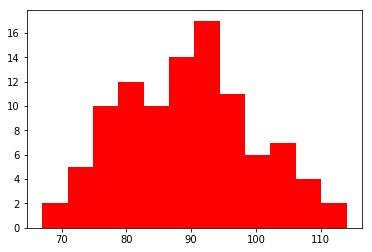

In [137]:
# Realizando el histograma de Poisson con lambda = 90
plt.hist(poisson, 12, color='r')
plt.show()

Lo anterior podría ser el caso de "cantidad de clientes que llegan a una cola de un banco por cada intervalo de media hora". <br> Si el banco dotara su sistema de atención basado en la media, tendría problemas para alcanzar su meta de Nivel de Servicio Acordado (e.g.: 85% de los clientes atendidos antes de 4 minutos).

Probemos con una Poisson con un Lambda muy pequeño; por ejemplo 1.2 (e.g.: cantidad de hijos por alumnos en esta clase)

In [120]:
lam = 1.2
size = 1000
poisson2 = np.random.RandomState(seed=1).poisson(lam=lam, size=size)
poisson2

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 3, 0, 0, 1, 2, 1, 2, 3, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 3, 0, 2, 2, 3, 1, 3, 1, 2, 1,
       2, 1, 2, 2, 3, 0, 2, 4, 0, 0, 0, 0, 2, 1, 0, 3, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 1, 3, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0,
       1, 3, 0, 4, 0, 4, 1, 1, 3, 1, 0, 0, 1, 2, 0, 1, 1, 5, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 3, 2, 0, 3, 2, 2, 1, 1, 2, 0, 1, 4, 0, 3, 2, 1, 1,
       1, 1, 3, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1,
       5, 0, 2, 1, 2, 0, 1, 2, 1, 0, 4, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 3, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 1, 1, 4, 0, 0, 4, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       3, 1, 0, 1, 2, 0, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 3, 3, 0,
       0, 1, 1, 4, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 3, 2, 2,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 3, 3, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1,

In [121]:
print('Media poblacional\t\t= {:4.2f}'.format(poisson2.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poisson2.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poisson2)))
print('Moda poblacional es {} y se repite {} veces'.format(str(stats.mode(poisson2)[0][0]),
                                              str(stats.mode(poisson2)[1][0])))


Media poblacional		= 1.22
Desviación estándar poblacional	= 1.09
Mediana poblacional		= 1.00
Moda poblacional es 1 y se repite 345 veces


In [123]:
# Ejecutar test de normalidad
stats.anderson(poisson2, dist='norm')

AndersonResult(statistic=47.031543197659175, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

El valor del test es **47,03**, debido a que no es menor a 0,784, no podemos concluir que los datos siguen una distribución normal.

Veamos su histograma:

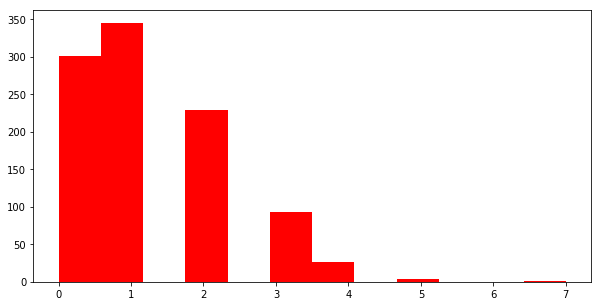

In [148]:
# Realizando el histograma de Poisson con lambda = 1,2
plt.figure(figsize=(10, 5))

plt.hist(poisson2, 12, color='r')
plt.show()

**TIPs:** La media es un indicador pobre si no se encuentra acompañada de la varianza, o de la probabilidad de ser alcanzada.

### Gamma

La distribución **Gamma** se utiliza con variables continuas (no discretas) que siguen una forma asimétrica (no normales). Ejemplos de fenómenos que se describen con esta distribución son: tiempo de duración procesos o ciclos productivos, vida útil de baterías y componentes eléctricos, vida de los seres vivos, caducidad de bienes perecibles, tiempo entre llegadas de pedidos de clientes, etc.

Crearemos una distribución del tipo Gamma aleatoria en la cual se utilizan dos parámetros:

* $\color{red} \alpha$ :: representa el parámetro de la forma
* $\color{red} \beta$ :: representa el parámetro de la escala
* $\color{red}n$ :: tamaño de la población o muetra según el caso

Nota:
* La media de una distribución Gamma se calcula $\color{red}{\alpha * \beta}$
* La desviación estándar es $\color{red}{\sqrt{\alpha} * \beta}$


In [24]:
def d_gamma(alfa, beta, n):
    return np.random.RandomState().gamma(alfa, beta, n)

In [47]:
alfa = 1
beta = 3
n = 1000
gamma = d_gamma(alfa, beta, n)

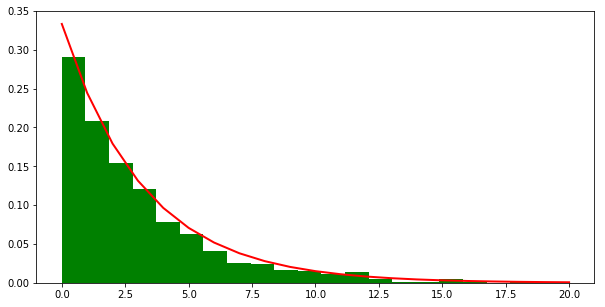

In [80]:
plt.figure(figsize=(10, 5))


count, bins, ignored = plt.hist(gamma, 20, normed=True, color='g')
y = (bins-1)**(alfa-1)*(np.exp(-bins/beta) / (sps.gamma(alfa)*beta**alfa))
plt.plot( y, linewidth=2, color='r')
plt.show()

In [128]:
x = np.linspace(0, 50, num=51)

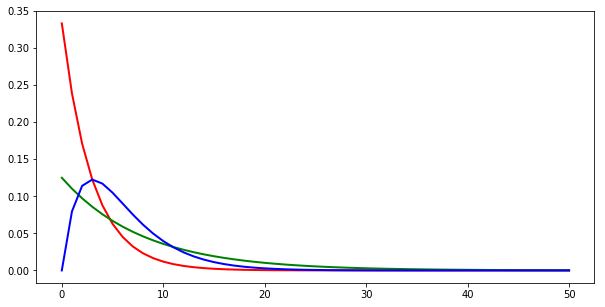

In [129]:
import scipy.special as sps

alfa = 1
beta = 3
alfa2 = 1
beta2 = 8
alfa3 = 2
beta3 = 3
plt.figure(figsize=(10,5))
y = x**(alfa-1)*(np.exp(-x/beta) / (sps.gamma(alfa)*beta**alfa))
plt.plot(x, y, linewidth=2, color='r')

y2 = x**(alfa2-1)*(np.exp(-x/beta2) / (sps.gamma(alfa2)*beta2**alfa2))
plt.plot(x, y2, linewidth=2, color='g')

y3 = x**(alfa3-1)*(np.exp(-x/beta3) / (sps.gamma(alfa3)*beta3**alfa3))
plt.plot(x, y3, linewidth=2, color='b')

plt.show()

## Teorema del límite central


In [73]:
def tlc(población, n_muestras, t_muestra):
    # n_muestras :: Cantidad de muestras a obtener
    # t_muestra :: Tamaño de las muestras
    medias = []
    for i in range(0, n_muestras):
        muestra = np.random.choice(población, t_muestra)
        medias.append(muestra.mean())
    return medias

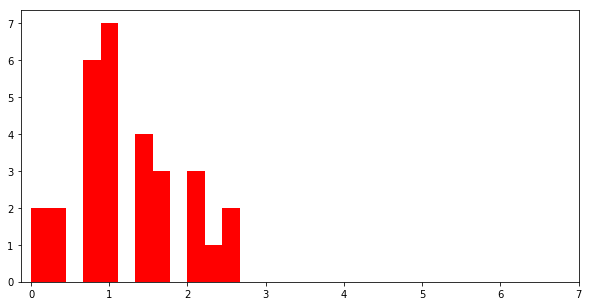

In [78]:
plt.figure(figsize=(10,5))

medias = tlc(poisson2, 30, 3)
plt.hist(medias, 12, color='r')
plt.xticks(range(0,8,1))
plt.show()

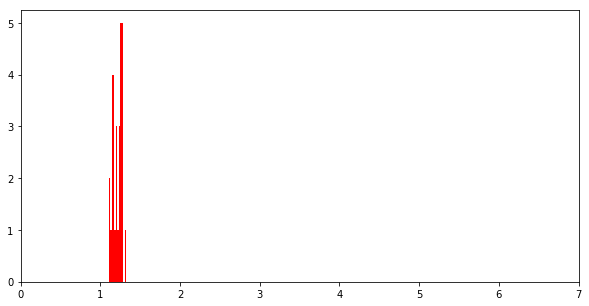

In [77]:
plt.figure(figsize=(10,5))
medias = tlc(poisson2, 30, 305)
plt.hist(medias, 12, color='r')
plt.xticks(range(0,8,1))
plt.show()

## Intervalos de confianza:
Como se mencionó anteriormente un estadístico es un estimador de un parámetro poblacional. Un estimador sencillo es el que hemos calculado anteriormente con las muestras, cuando sólo tenemos un valor, a este se le llama estimador puntual.

Un buen estimador debe ser **insesgado** (cuando la media de su distribución muestral asociada coincide con la media de la población) y de **varianza mínima** (bajo sigma de las medias muestrales).  El sigma de las medias muestrales fue comentado en TLC, donde: sigma medias muestrales = sigma pobblación /raiz(n). Observar que cuanto mayor sea el tamaño de la muestra n , menor será la variabilidad del estimador de la media poblacional.

Sabemos por TLC que para valores grandes de n, independiente de la distribución estadística que tenga su población, la media muestral sigue una distribución normal con media (Xbarra Barra) y sigma (sigma poblacional/raiz(n)).
Por otra parte, el Teorema de Chebyshev nos dice que, en una distribución normal, aproximadamente un 95% de los datos estaban situados a una distancia inferior a dos desviaciones estándar de la media. 

**Intervalos de confianza:** es un par o varios pares de números entre los cuales se estima que estará cierto valor desconocido con una determinada probabilidad de acierto. Formalmente, estos números determinan un intervalo, que se calcula a partir de datos de una muestra, y el valor desconocido es un parámetro poblacional. La probabilidad de éxito en la estimación se representa con 1 - α y se denomina nivel de confianza. En estas circunstancias, α es el llamado error aleatorio o nivel de significación, esto es, una medida de las posibilidades de fallar en la estimación mediante tal intervalo.
    
    
    

1) Intervalo de confianza para medias cuando Sigma poblacional es conocido o la muestra es mayor a 120

In [177]:
# Estimador de medias cuando Sigma poblacional es conocido o la muestra es mayor a 120
# Entonces usar Tabla Z (Normal)
# Mu +- Z(1- α/2)* Sigma poblacional / raiz (n)
# Ejemplo 1: queremos estimar la media poblacional con un 95% de seguridad, sabemos que la muestra que manejamos tiene 130 casos,
# y su media muestral es 22.2 y el sigma muestral es 1.45

n = 130
Xbarra = 22.2
S = 1.45
NC = 0.95 # nivel de confianza
alfa = 1-NC # nivel de significación
Z = stats.norm.ppf(1-(alfa/2)) # Z(1- α/2) "aplicando inversa de 2 colas"

LI = Xbarra - Z*S/(math.sqrt(n)) # Límite inferior del IC
LS = Xbarra + Z*S/(math.sqrt(n)) # Límite superior del IC

print('LI=',LI,';','LS=',LS,". Con un NC de:",NC)

LI= 21.950744691121898 ; LS= 22.4492553088781 . Con un NC de: 0.95


In [178]:
# Estimador de medias cuando Sigma poblacional es conocido o la muestra es mayor a 120
# Entonces usar Tabla Z (Normal)
# Mu +- Z(1- α/2)* Sigma poblacional / raiz (n)
# Ejemplo 2: queremos estimar la media poblacional con un 95% de seguridad, sabemos que la muestra que manejamos tiene 35 casos,
# y su media muestral es 22.2 y el sigma muestral es 1.45
# pero nos dicen que la desviación estandar poblacional es de 1.56

n = 35
Xbarra = 22.2
S = 1.45 # No usar este
Sigma = 1.56 # Usar este valor
NC = 0.95 # nivel de confianza
alfa = 1-NC # nivel de significación
Z = stats.norm.ppf(1-(alfa/2)) # Z(1- α/2) "aplicando inversa de 2 colas"

LI = Xbarra - Z*Sigma/(math.sqrt(n)) # Límite inferior del IC
LS = Xbarra + Z*Sigma/(math.sqrt(n)) # Límite superior del IC

print('LI=',LI,';','LS=',LS,". Con un NC de:",NC)

LI= 21.68318076699761 ; LS= 22.71681923300239 . Con un NC de: 0.95


2) cuando Sigma poblacional es desconocido y la muestra es menor a 120

In [179]:
# Estimador de medias cuando Sigma poblacional es desconocido y la muestra es menor a 120
# Entonces usar Tabla T (Student)
# Mu +- T(1- α/2; n-gl) * S / raiz (n)
# Ejemplo 1: queremos estimar la media poblacional con un 95% de seguridad, sabemos que la muestra que manejamos tiene 40 casos,
# y su media muestral es 22.2 y el sigma muestral es 1.45

n = 40
Xbarra = 22.2
S = 1.45
NC = 0.95 # nivel de confianza
alfa = 1-NC # nivel de significación
gl = n-1 # grados de libertad
T = stats.t.ppf(1-(alfa/2),n) # T(1- α/2; n-gl) "aplicando inversa de 2 colas"

LI = Xbarra - T*S/(math.sqrt(n)) # Límite inferior del IC
LS = Xbarra + T*S/(math.sqrt(n)) # Límite superior del IC

print('LI=',LI,';','LS=',LS,". Con un NC de:",NC)


LI= 21.736637888845724 ; LS= 22.663362111154274 . Con un NC de: 0.95


 ### ¿Qué pasa si queremos estimar proporciones?
 R: aplicar método 1 si np>=5, 
 donde:
 Xbarra = p
 S = raiz (p*1-p)
 

 

## Correlación

La correlación trata de establecer la relación o dependencia que existe entre las dos variables que intervienen en una distribución bidimensional. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es positiva cuando los valores de las variables aumenta juntos; y es negativa cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.

## Percentiles
El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo de observaciones. <br>
Por ejemplo, el percentil 75º es el valor bajo el cual se encuentran el 75 por ciento de las observaciones.

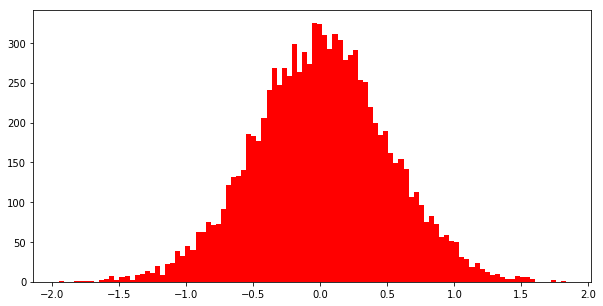

In [125]:
datos = np.random.normal(0, 0.5, 10000)
plt.figure(figsize=(10,5))
plt.hist(datos, 100, color='r')
plt.show()

In [128]:
print('El percentil 50 de los datos es: {:4.2f}'.format(np.percentile(datos, 50)))
print('El percentil 75 de los datos es: {:4.2f}'.format(np.percentile(datos, 75)))
print('El percentil 90 de los datos es: {:4.2f}'.format(np.percentile(datos, 90)))

El percentil 50 de los datos es: 0.01
El percentil 75 de los datos es: 0.33
El percentil 90 de los datos es: 0.64


## Covarianza

Covarianza: La covarianza es el equivalente de la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias respectivas.La covarianza indica el sentido de la correlación entre las variables:

Si $\sigma_{xy} > 0$ la correlación es directa 

Si $\sigma_{xy} < 0$ la correlación es inversa

La covarianza mide cómo dos variables varían en tándem de sus medias.
Por ejemplo, supongamos que trabajamos para una empresa de comercio electrónico, y están interesados en encontrar una correlación entre la velocidad de *rendering* la página y cuánto gasta un cliente en dicha página.
Numpy ofrece métodos de covarianza, pero lo haremos de la "manera difícil" de mostrar lo que ocurre debajo del capó. Básicamente tratamos cada variable como un vector de desviaciones de la media, y calculamos el "producto punto" de ambos vectores. Geométricamente, se puede considerar que este es el ángulo entre los dos vectores en un espacio de alta dimensión, pero solo se puede considerar como una medida de similitud entre las dos variables.
Primero, hagamos que la velocidad de la página y la cantidad de compra sean totalmente aleatorias e independientes entre sí; se producirá una covarianza muy pequeña ya que no existe una correlación real:

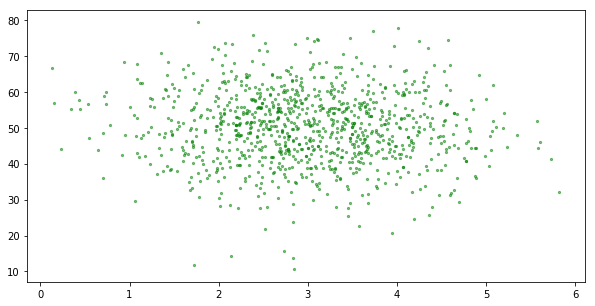

In [113]:
import numpy as np
#from pylab import *

def desv_media(x):
    media_x = mean(x)
    return [xi - media_x for xi in x]

def covarianza(x, y):
    n = len(x)
    return dot(desv_media(x), desv_media(y)) / (n-1)

plt.figure(figsize=(10,5))

tiempoRender= np.random.normal(3.0, 1.0, 1000)
cantidadComprada = np.random.normal(50.0, 10.0, 1000)

plt.scatter(tiempoRender, cantidadComprada, alpha=0.5, s=5, color='g')

In [115]:
# Calculemos la covarianza
print('Covarianza entre el tiempo de rendering y cantidad gastada = {:4.2f}'.
      format(covarianza (tiempoRender, cantidadComprada)))

Covarianza entre el tiempo de rendering y cantidad gastada = -0.59


Ahora haremos un ejercicio dividiendo la cantidad gastada por la velocidad de la página (utilizamos una operación punto ente matrices). Esto nos dará una correlación mña real. 

Covarianza entre el tiempo de rendering y cantidad gastada = -10.05


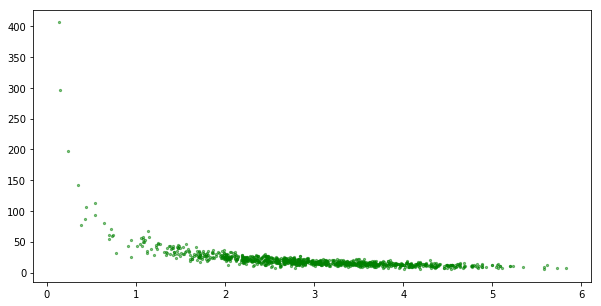

In [116]:
cantidadComprada = np.random.normal(50.0, 10.0, 1000) / tiempoRender
plt.figure(figsize=(10,5))
plt.scatter(tiempoRender, cantidadComprada, alpha=0.5, s=5, color='g')
print('Covarianza entre el tiempo de rendering y cantidad gastada = {:4.2f}'.
      format(covarianza (tiempoRender, cantidadComprada)))

La relación negativa nos indica que conforme el tiempo de *rendering* aumenta, la cantidad gastada en la página disminuye.

In [119]:
def correlacion(x, y):
    # x e y son arreglos n x m
    devstd_x = x.std()
    devstd_y = y.std()
    try:
        return covarianza(x,y) / devstd_x / devstd_y  
    except ZeroDivisionError:
        print ('División por cero')
        
        
print('Correlación entre el tiempo de rendering y cantidad gastada = {:4.2f}'.
      format(correlacion (tiempoRender, cantidadComprada)))

Correlación entre el tiempo de rendering y cantidad gastada = -0.53


Veamos el camino corto con Numpy

In [118]:
np.corrcoef(tiempoRender, cantidadComprada)

array([[ 1.        , -0.53258311],
       [-0.53258311,  1.        ]])

Correlación entre el tiempo de rendering y cantidad gastada = -1.00


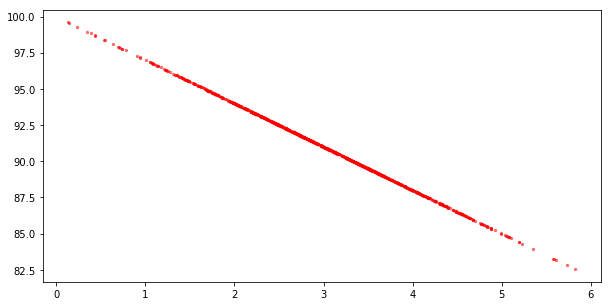

In [121]:
cantidadComprada2 = 100 - tiempoRender * 3
plt.figure(figsize=(10,5))
plt.scatter(tiempoRender, cantidadComprada2, alpha=0.5, s=5, color='r')
print('Correlación entre el tiempo de rendering y cantidad gastada = {:4.2f}'.
      format(correlacion (tiempoRender, cantidadComprada2)))

<font color='blue'>Observación: </font>Correlación no implica causalidad.

## De aquí para abajo no va

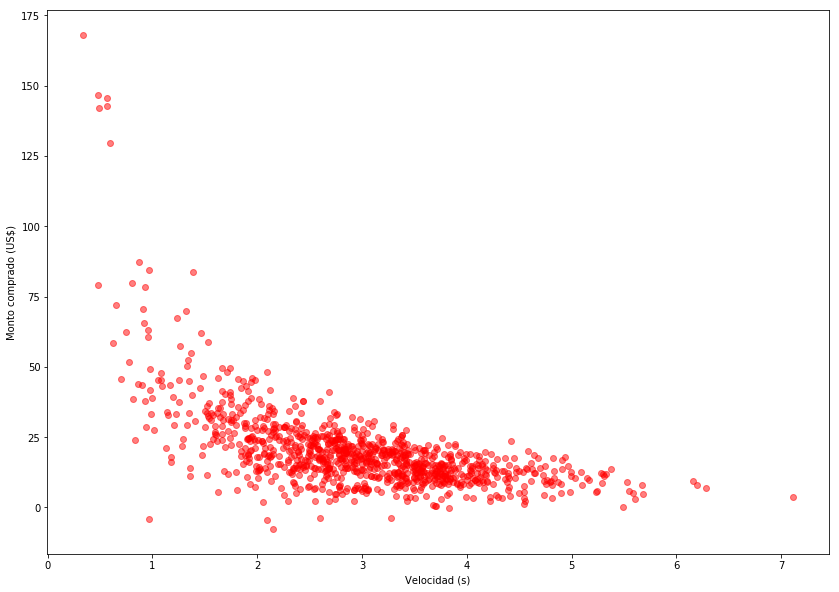

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

plt.figure(figsize =(14, 10))
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
plt.xlabel('Velocidad (s)')
plt.ylabel('Monto comprado (US$)')
purchaseAmount = np.random.normal(50.0, 20.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount, color='r', alpha=0.5)

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(12, 10))
xp = np.linspace(0, 10, 400)
plt.scatter(x, y, c='r',alpha=0.5)
plt.plot(xp, p1(xp), c='b')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p5(x))

print('r2 = {:.3f}'.format(r2))
